In [29]:
import numpy as np
import scipy.optimize as optim
import math
import os,sys
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

In [2]:
data_folder = '/Users/sns9/Research/GrowthCurves/ATP/'
os.chdir(data_folder)

ATP_offset = 1

In [3]:
atp = pd.read_csv('ATP-AHTvalues.csv',header=None).to_numpy()
atp_v = np.zeros(shape=(atp.shape[0],3))

for k in range(0,atp.shape[0]):
    atp_v[k,0] = np.mean(atp[k,:])
    
    bound = stats.t.interval(0.95, len(atp[k,:])-1, loc=np.mean(atp[k,:]), scale=stats.sem(atp[k,:]))

    atp_v[k,1] = bound[1] - atp_v[k,0]
    atp_v[k,2] = atp_v[k,0] - bound[0]
    
#print(atp_v)
np.savetxt('atpAHTs.csv',atp_v,delimiter=',')

In [9]:
def ATPfunc(x,a,b):
    return (a + b*x)
    
    #return (a + b*(x-np.log(100)))

In [5]:
#v_data = pd.read_csv('Viability_T1-ATP-fit.csv',)
v7 = pd.read_csv('ATP-T2-Study7.csv').to_numpy()[:-1,:]
v9 = pd.read_csv('ATP-T2-Study9.csv').to_numpy()[:-1,:]
vAHT = pd.read_csv('ATP-T2-AHT.csv').to_numpy()[:-1,:]
print(v7.shape)

(6, 6)


In [6]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(v7[:,0]),np.log(v7[:,3]))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 1*perr[0]
popt_ul[1] -= 1*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 1*perr[0]
popt_ll[1] += 1*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = math.exp(1)**ATPfunc(np.log(v7[:,0]),popt[0],popt[1])

atp_array7 = np.log(np.linspace(0.4,0.75,501))
atp7 = math.exp(1)**atp_array7
ts7 = math.exp(1)**ATPfunc(atp_array7,popt[0],popt[1])

#print(ts7)

t_ul7 = math.exp(1)**ATPfunc(atp_array7,popt_ul[0],popt_ul[1])
t_ll7 = math.exp(1)**ATPfunc(atp_array7,popt_ll[0],popt_ll[1])

err7 = np.zeros(shape=(2,ts7.shape[0]))
err7[0,:] = ts7 - t_ll7
err7[1,:] = t_ul7 - ts7

chisq, p = stats.chisquare(v7[:,3], atp_fit)
print(math.sqrt(chisq))

[ 3.78063476 -1.78852152]
[0.32828526 0.5248924 ]
4.3962953696986675


In [7]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(v9[:,0]),np.log(v9[:,3]))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = math.exp(1)**ATPfunc(np.log(v9[:,0]),popt[0],popt[1])

atp_array9 = np.log(np.linspace(0.7,0.9,501))
atp9 = math.exp(1)**atp_array9
ts9 = math.exp(1)**ATPfunc(atp_array9,popt[0],popt[1])

t_ul9 = math.exp(1)**ATPfunc(atp_array9,popt_ul[0],popt_ul[1])
t_ll9 = math.exp(1)**ATPfunc(atp_array9,popt_ll[0],popt_ll[1])

chisq, p = stats.chisquare(v9[:,3], atp_fit)
print(math.sqrt(chisq))

[ 3.85168553 -3.94611658]
[0.15205743 0.56664541]
2.572355036548539


In [8]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(vAHT[:,0]),np.log(vAHT[:,3]))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = math.exp(1)**ATPfunc(np.log(vAHT[:,0]),popt[0],popt[1])

atp_arrayAHT = np.log(np.linspace(0.6,0.85,501))
atpAHT = math.exp(1)**atp_arrayAHT
tsAHT = math.exp(1)**ATPfunc(atp_arrayAHT,popt[0],popt[1])

t_ulAHT = math.exp(1)**ATPfunc(atp_arrayAHT,popt_ul[0],popt_ul[1])
t_llAHT = math.exp(1)**ATPfunc(atp_arrayAHT,popt_ll[0],popt_ll[1])

chisq, p = stats.chisquare(vAHT[:,3], atp_fit)
print(math.sqrt(chisq))

[ 3.69657395 -3.12304946]
[0.4394334  1.14743152]
5.591558080951028


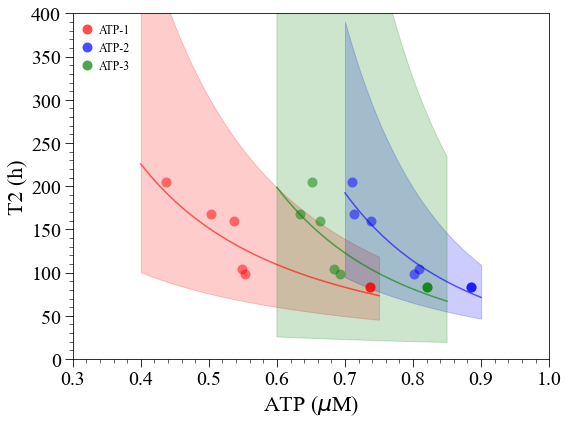

In [15]:
fig, axs = plt.subplots(figsize=(8,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

#plt.errorbar(v7[:,0],v7[:,3],v7[:,4],v7[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='r',capsize=5,capthick=1)
plt.plot(v7[:,0],v7[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='r')
#plt.errorbar(atp7,ts7,err7,fmt='o',lw=2,alpha=0.2,mew=2,ms=7,color='r',capsize=5,capthick=1,label='Study 7')
plt.plot(atp7,ts7,linewidth=1.5,color='r',alpha=0.6)
#plt.plot(atp7,ts7,linewidth=1.5,color='r',alpha=0.6,label=r'43.8[ATP]$^{-1.78};\chi = 4.4$ h')
plt.fill_between(atp7,t_ll7,t_ul7,color='r',alpha=0.2)

#plt.errorbar(v9[:,0],v9[:,3],v9[:,4],v9[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='b',capsize=5,capthick=1)
plt.plot(v9[:,0],v9[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='b')
plt.plot(atp9,ts9,linewidth=1.5,color='b',alpha=0.6)
#plt.plot(atp9,ts9,linewidth=1.5,color='b',alpha=0.6,label=r'47[ATP]$^{-3.95};\chi = 2.6$ h')
plt.fill_between(atp9,t_ll9,t_ul9,color='b',alpha=0.2)
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)


#plt.errorbar(vAHT[:,0],vAHT[:,3],vAHT[:,4],vAHT[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='g',capsize=5,capthick=1)
plt.errorbar(vAHT[:,0],vAHT[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='g')
plt.plot(atpAHT,tsAHT,linewidth=1.5,color='g',alpha=0.6)
#plt.plot(atpAHT,tsAHT,linewidth=1.5,color='g',alpha=0.6,label=r'40.4[ATP]$^{-3.12};\chi = 5.6$ h')
plt.fill_between(atpAHT,t_llAHT,t_ulAHT,color='g',alpha=0.2)
#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='o',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='o',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

plt.plot(v7[0,0],v7[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='r',label='ATP-1')
plt.plot(v9[0,0],v9[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='b',label='ATP-2')
plt.plot(vAHT[0,0],vAHT[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='g',label='ATP-3')

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'ATP ($\mu$M)',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
plt.xlim(0.3,1.0)
plt.ylim(0,400)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 12},markerscale=1.0,handlelength=0.5, loc='upper left')
plt.tight_layout()

plt.savefig('ATP-summary-m60wAHT-5.png',dpi=600)

In [8]:
xs = v_data['AODAPI'].to_numpy()
max_atp = np.max(xs)
print(xs)

NameError: name 'v_data' is not defined

In [14]:
x_data = np.zeros(shape=(n_data*xs.shape[0],))
y_data = np.zeros(shape=(n_data*xs.shape[0],))

n = 0

for k in list(v_data):
    if 'T2' in k:
        x_data[n:n+xs.shape[0]] = xs #- ATP_offset
        y_data[n:n+xs.shape[0]] = v_data[k].to_numpy()
        
        n += xs.shape[0]
        
print(x_data,y_data)

[91.04825156 90.41634933 85.12091253 78.79769836 77.35471704 65.48592972
 62.26655348 96.18375836 94.70832686 89.54151808 83.75735913 71.58916709
 68.47107004 97.0877899  91.58067542 77.32832916 61.26893939 91.72106306
 94.21362799 63.61224296 64.17491872] [ 74.93339334 122.590459   104.1071107  164.4527453  150.7650765
 193.5265527  443.6012601  102.3087309   80.82808281  85.02430243
 126.7866787  147.2682268  178.0405041   93.01710171 112.9990999
 193.4266427  212.209721    71.63636364  72.13591359 159.6570657
 190.129613  ]


In [15]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(x_data),np.log(y_data))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

[ 4.34060711 -2.38624714]
[0.09083485 0.32891399]


In [16]:
#atp_array = np.log(np.linspace(0.2,0.8,51))#-ATP_offset)
atp_array = np.log(np.linspace(60,100,51))#-ATP_offset)
ts = math.exp(1)**ATPfunc(atp_array,popt[0],popt[1])

t_ul = math.exp(1)**ATPfunc(atp_array,popt_ul[0],popt_ul[1])
t_ll = math.exp(1)**ATPfunc(atp_array,popt_ll[0],popt_ll[1])

#atp_array = np.log(np.linspace(90,100,41))

total_data = np.zeros(shape=(ts.shape[0],4))
total_data[:,0] = math.exp(1)**atp_array #+ ATP_offset
total_data[:,1] = ts
total_data[:,2] = t_ul - ts
total_data[:,3] = ts - t_ll

cols = ['x','y','+','-']
solved_data = pd.DataFrame(total_data,columns=cols)
solved_data.to_csv('pairedAODAPIT2_fit-24-g.csv',index=None)
#solved_data.to_csv('paired-AODAPI_fit-24-g.csv',index=None)

#np.savetxt('viability_fit-60.csv',total_data,delimiter=',')

In [30]:
data_folder = '/Users/sns9/Research/GrowthCurves/ATP/'
os.chdir(data_folder)

v7 = pd.read_csv('ATP-T2-Study7-normal.csv').to_numpy()[:-1,:]
v9 = pd.read_csv('ATP-T2-Study9-normal.csv').to_numpy()[:-1,:]

In [40]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(v7[:,0]),np.log(v7[:,3]))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 1*perr[0]
popt_ul[1] -= 1*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 1*perr[0]
popt_ll[1] += 1*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = math.exp(1)**ATPfunc(np.log(v7[:,0]),popt[0],popt[1])

atp_array7 = np.log(np.linspace(0.5,1,501))
atp7 = math.exp(1)**atp_array7
ts7 = math.exp(1)**ATPfunc(atp_array7,popt[0],popt[1])
vmod7 = math.exp(1)**ATPfunc(np.log(v7[:,0]),popt[0],popt[1])

#print(ts7)

t_ul7 = math.exp(1)**ATPfunc(atp_array7,popt_ul[0],popt_ul[1])
t_ll7 = math.exp(1)**ATPfunc(atp_array7,popt_ll[0],popt_ll[1])

err7 = np.zeros(shape=(2,ts7.shape[0]))
err7[0,:] = ts7 - t_ll7
err7[1,:] = t_ul7 - ts7

chisq, p = stats.chisquare(v7[:,3], atp_fit)
print(math.sqrt(chisq))

[ 4.32698639 -1.78888685]
[0.17778363 0.52553748]
4.400035571676106


In [47]:
popt, pcov = optim.curve_fit(ATPfunc,np.log(v9[:,0]),np.log(v9[:,3]))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

popt_ul = copy.deepcopy(popt)
popt_ul[0] += 2*perr[0]
popt_ul[1] -= 2*perr[1]
#opt_ul[2] += perr[2]

popt_ll = copy.deepcopy(popt)
popt_ll[0] -= 2*perr[0]
popt_ll[1] += 2*perr[1]
#opt_ll[2] -= perr[2]

atp_fit = math.exp(1)**ATPfunc(np.log(v9[:,0]),popt[0],popt[1])

vmod9 = math.exp(1)**ATPfunc(np.log(v9[:,0]),popt[0],popt[1])

atp_array9 = np.log(np.linspace(0.5,1,501))
atp9 = math.exp(1)**atp_array9
ts9 = math.exp(1)**ATPfunc(atp_array9,popt[0],popt[1])

t_ul9 = math.exp(1)**ATPfunc(atp_array9,popt_ul[0],popt_ul[1])
t_ll9 = math.exp(1)**ATPfunc(atp_array9,popt_ll[0],popt_ll[1])

chisq, p = stats.chisquare(v9[:,3], atp_fit)
print(math.sqrt(chisq))

[ 4.33276484 -3.9482891 ]
[0.08840269 0.56695422]
2.573439893249039


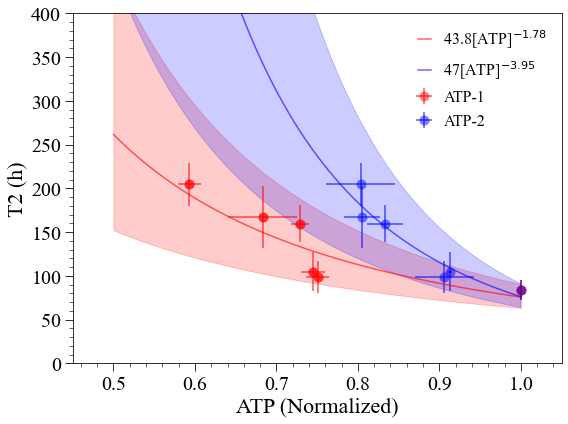

In [39]:
fig, axs = plt.subplots(figsize=(8,6))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

plt.errorbar(v7[:,0],v7[:,3],v7[:,4],v7[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='r',capsize=5,capthick=1,label='ATP-1')
plt.plot(v7[:,0],v7[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='r')
#plt.errorbar(atp7,ts7,err7,fmt='o',lw=2,alpha=0.2,mew=2,ms=7,color='r',capsize=5,capthick=1,label='Study 7')
#plt.plot(atp7,ts7,linewidth=1.5,color='r',alpha=0.6)
plt.plot(atp7,ts7,linewidth=1.5,color='r',alpha=0.6,label=r'43.8[ATP]$^{-1.78}$')#;\chi = 4.4$ h')
plt.fill_between(atp7,t_ll7,t_ul7,color='r',alpha=0.2)

plt.errorbar(v9[:,0],v9[:,3],v9[:,4],v9[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='b',capsize=5,capthick=1,label='ATP-2')
#plt.plot(v9[:,0],v9[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='b')
#plt.plot(atp9,ts9,linewidth=1.5,color='b',alpha=0.6)
plt.plot(atp9,ts9,linewidth=1.5,color='b',alpha=0.6,label=r'47[ATP]$^{-3.95}$')#';\chi = 2.6$ h')
plt.fill_between(atp9,t_ll9,t_ul9,color='b',alpha=0.2)
#plt.plot(v24[:,0],v24[:,3],marker='o',linewidth=0,ms=8,color='c',alpha=0.7,label='24 h',mew=0)


#plt.errorbar(vAHT[:,0],vAHT[:,3],vAHT[:,4],vAHT[:,1],fmt='o',lw=2,alpha=0.5,mew=0,ms=10,color='g',capsize=5,capthick=1)
#plt.errorbar(vAHT[:,0],vAHT[:,3],marker='o',lw=0.0,alpha=0.5,mew=0,ms=10,color='g')
#plt.plot(atpAHT,tsAHT,linewidth=1.5,color='g',alpha=0.6)
#plt.plot(atpAHT,tsAHT,linewidth=1.5,color='g',alpha=0.6,label=r'40.4[ATP]$^{-3.12};\chi = 5.6$ h')
#plt.fill_between(atpAHT,t_llAHT,t_ulAHT,color='g',alpha=0.2)
#plt.errorbar(v48[:,0],v48[:,3],v48[:,4],v48[:,1],fmt='o',lw=2,alpha=0.7,mew=2,ms=7,color='m',capsize=5,capthick=1,label='48 h')
#plt.plot(v48[:,0],v48[:,3],marker='o',linewidth=0,ms=8,color='m',alpha=0.7,label='48 h',mew=0)

#plt.errorbar(v72[:,0],v72[:,3],v72[:,4],v72[:,1],fmt='o',lw=3,alpha=0.7,mew=2,ms=7,color='y',capsize=5,capthick=1,label='72 h')
#plt.plot(v72[:,0],v72[:,3],marker='o',linewidth=0,ms=8,color='y',alpha=0.7,label='72 h',mew=0)

#plt.plot(v7[0,0],v7[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='r',label='ATP-1')
#plt.plot(v9[0,0],v9[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='b',label='ATP-2')
#plt.plot(vAHT[0,0],vAHT[0,3],marker='o',lw=0.0,alpha=0.7,mew=0,ms=10,color='g',label='ATP-3')

plt.xticks(size=20)
plt.yticks(size=20)  
plt.xlabel(r'ATP (Normalized)',size=22)
plt.ylabel(r'T2 (h)',size=22,rotation=90)
plt.minorticks_on()
plt.xlim(0.45,1.05)
plt.ylim(0,400)
axs.tick_params(which='major', length=8)
axs.tick_params(which='minor', length=4)
plt.legend(frameon=False,prop={'size': 16},markerscale=1.0,handlelength=0.8, loc='upper right')
plt.tight_layout()

plt.savefig('ATP-normalized.png',dpi=600)

In [45]:
chisq = np.sum((v7[:,3]- vmod7)**2)
chisq *= 1.0/float(v7.shape[0]-2)

print(math.sqrt(chisq))

25.235872023013638


In [48]:
chisq = np.sum((v9[:,3]- vmod9)**2)
chisq *= 1.0/float(v9.shape[0]-2)

print(math.sqrt(chisq))

15.730207572248164


In [49]:
print(v7[:,3],vmod7)

[ 83.62556256  98.6919892  104.5067507  159.6370837  167.3168317
 204.7963996 ] [ 75.71576445 126.46426516 128.17845653 133.22870547 149.68219485
 192.76310353]


In [50]:
print(v9[:,3],vmod9)

[ 83.62556256  98.6919892  104.5067507  159.6370837  167.3168317
 204.7963996 ] [ 76.15455119 112.33011584 109.15419547 156.09000471 179.04836443
 180.79361144]
